# Day 15: Beverage Bandits

In [3]:
import numpy as np

WALL   = 1
EMPTY  = 0
ELF    = 2
GOBLIN = 3

def readMap(filename):
    with open(filename) as f:
        lines = [ l.strip("\n") for l in f.readlines() ]
    elfs = []
    gobl = []
    grid = np.zeros((len(lines),len(lines[0])))
    y = 0
    for l in lines:
        x = 0
        for c in l:
            if c=="#":
                grid[y,x] = WALL
            elif c=="E":
                grid[y,x] = ELF
                elfs.append((x,y))
            elif c=="G":
                grid[y,x] = GOBLIN
                gobl.append((x,y))
            x +=1
        y+=1
    return grid,elfs,gobl

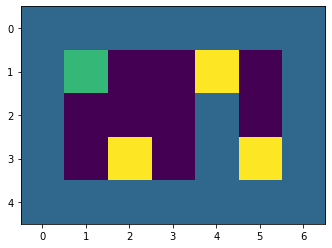

In [59]:
import matplotlib.pyplot as plt
grid,elfs,gobl = readMap("data/day15test0.txt")
plt.imshow(grid)

In [66]:
from queue import Queue
from copy import deepcopy

def neig(p,grid):
    '''Neigbouring steps returned in reading orders'''
    xp,yp = p
    return [ (xp+i,yp+j) for i,j in ((-1,0),(0,-1),(0,+1),(+1,0))  
            if 0<=xp+i<len(grid[0]) and 0<=yp+j<len(grid) and grid[yp+j][xp+i]==EMPTY ]

def searchPaths(s,e,grid):
    '''
        Return all shortest paths from s to e  assuming walls, elfs and goblins are not traversable. 
        Using BFS and returning all paths that have euqal lenght to first found path, shorttest by definition.
        Using path themselves to track whether a position was already explored in current path.
    '''
    q = Queue()
    q.put([s])
    paths = []
    while len(q.queue):
        path = q.get()
        if path[-1] == e: # found end
            if len(paths):
                if len(path)==len(paths[-1]):
                    paths.append(path)
            else:
                paths.append(path)
        for n in neig(path[-1],grid):
            if n not in path:
                # only follow path is not path found yet, or current is shorter then already found
                if len(paths)==0 or len(paths[-1])>len(path):
                    pathnew = deepcopy(path)
                    pathnew.append(n)
                    q.put(pathnew)
    # sort according to second step (Y,X) get "reading" order (smaller Y first, then smaller X for same Y)
    #return paths
    return sorted(paths, key=lambda x: (x[1][1],x[1][0]))  

In [67]:
grid,elfs,gobl = readMap("data/day15test0.txt")

searchPaths((1,1),(2,2),grid)
#searchPaths((1,1),(5,2),grid)

[[(1, 1), (2, 1), (2, 2)], [(1, 1), (1, 2), (2, 2)]]

In [85]:
from collections import defaultdict

def chooseTargetPath(e,targets,grid):
    inrange = [] # in range targets
    for t in targets:
        for n in neig(t,grid):
            if n not in inrange:
                inrange.append(n)
    paths = defaultdict(lambda: []) # paths to reachable targets, grouped by lenght
    for i in inrange:
        p = searchPaths(e,i,grid)
        if len(p): # empty paths are non-reachable positions
            # taking first shortest path in case there are multiple paths, sorting in searchPaths()
            paths[len(p[0])].append(p[0]) 
    if len(paths.keys()): 
        # collection of shortest paths to targets
        nearest = paths[min(paths.keys())]
        # reverse sort according to target position (last in path) and (Y,X) coordinates
        nearest = sorted(nearest,key=lambda x: (x[-1][1],x[-1][1]) )
        return nearest[0]
    else:
        return []

In [86]:
# Targets:      In range:     Reachable:    Nearest:      Chosen:  
# #######       #######       #######       #######       #######  
# #E..G.#       #E.?G?#       #E.@G.#       #E.!G.#       #E.+G.#  
# #...#.#  -->  #.?.#?#  -->  #.@.#.#  -->  #.!.#.#  -->  #...#.#  
# #.G.#G#       #?G?#G#       #@G@#G#       #!G.#G#       #.G.#G#  
# #######       #######       #######       #######       #######  

grid,elfs,gobl = readMap("data/day15test0.txt")
chooseTargetPath((1,1),gobl,grid)

[(1, 1), (2, 1), (3, 1)]

In [87]:
grid,elfs,gobl = readMap("data/day15test1.txt")
chooseTargetPath((2,1),gobl,grid)

[(2, 1), (3, 1), (3, 2), (4, 2)]

[(1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3)]

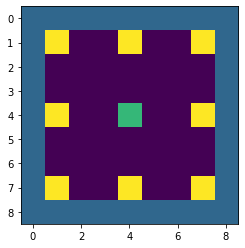

In [88]:
grid,elfs,gobl = readMap("data/day15test2.txt")
plt.imshow(grid)
chooseTargetPath((1,1),[(4,4)],grid)

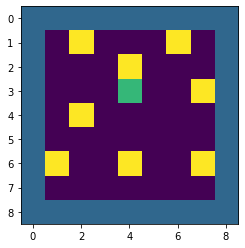

(4, 2) (4, 3)
(4, 3) (4, 2)


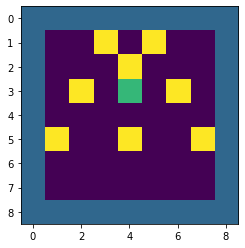

(4, 2) (4, 3)
(4, 3) (3, 3)


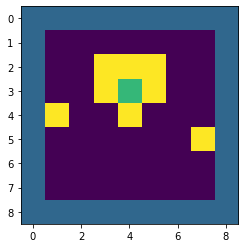

In [90]:
grid,elfs,gobl = readMap("data/day15test2.txt")

def targetRange(p,grid):
    '''return coordinate of anything that is not WALL around unit. To be tested against Elf or Goblin lists.'''
    xp,yp = p
    return [ (xp+i,yp+j) for i,j in ((-1,0),(0,-1),(0,+1),(+1,0))  
            if 0<=xp+i<len(grid[0]) and 0<=yp+j<len(grid) and grid[yp+j][xp+i]!=WALL ]

r = 0

while r<3:
    
    units = sorted(elfs+gobl, key=lambda u: (u[1],u[0]))
    
    for u in units:
        
        attack = False
        
        for t in targetRange(u,grid):
            if u in gobl and t in elfs:
                attack = True
                break
            elif u in elfs and t in gobl:
                attack = True
                break
                
        if not attack:
        
            if u in gobl:            
                p = chooseTargetPath(u,elfs,grid)
                if len(p):
                    xn,yn = p[1]
                    xu,yu = u
                    grid[yu][xu]=EMPTY
                    grid[yn][xn]=GOBLIN
                    gobl.pop(gobl.index(u))
                    gobl.append(p[1])
            elif u in elfs:
                p = chooseTargetPath(u,gobl,grid)
                if len(p):
                    xn,yn = p[1]
                    xu,yu = u
                    grid[yu][xu]=EMPTY
                    grid[yn][xn]=ELF
                    elfs.pop(elfs.index(u))
                    elfs.append(p[1])
                    
        else: # attack
            print(u,t)

    r+=1
    plt.imshow(grid)
    plt.show()